In [5]:
import numpy as np
import os 
from os import path
import pickle
import requests
from io import BytesIO # Use When expecting bytes-like objects
from sklearn.model_selection import train_test_split

In [3]:
def load_data():
    print("Loading data \n")
    # Check for already loaded datasets
    if not(path.exists('xtrain.pickle')):
        # Load from web
        print("Loading data from the web \n")

        # Classes we will load
        categories = ['bowtie', 'lipstick','purse','sock','umbrella']

        # Dictionary for URL and class labels
        URL_DATA = {}
        for category in categories:
            URL_DATA[category] = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/' + category +'.npy'

        # Load data for classes in dictionary
        classes_dict = {}
        for key, value in URL_DATA.items():
            response = requests.get(value)
            classes_dict[key] = np.load(BytesIO(response.content))

        # Generate labels and add labels to loaded data
        for i, (key, value) in enumerate(classes_dict.items()):
            value = value.astype('float32')/255.
            if i == 0:
                classes_dict[key] = np.c_[value, np.zeros(len(value))]
            else:
                classes_dict[key] = np.c_[value,i*np.ones(len(value))]

        lst = []
        for key, value in classes_dict.items():
            lst.append(value[:3000])
        doodles = np.concatenate(lst)

        # Split the data into features and class labels (X & y respectively)
        y = doodles[:,-1].astype('float32')
        X = doodles[:,:784]

        # Split each dataset into train/test splits
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    else:
        # Load data from pickle files
        print("Loading data from pickle files \n")

        file = open("xtrain.pickle",'rb')
        X_train = pickle.load(file)
        file.close()

        file = open("xtest.pickle",'rb')
        X_test = pickle.load(file)
        file.close()

        file = open("ytrain.pickle",'rb')
        y_train = pickle.load(file)
        file.close()

        file = open("ytest.pickle",'rb')
        y_test = pickle.load(file)
        file.close()

    return X_train, y_train, X_test, y_test

In [1]:
# loading dataset
import numpy as np
bowtie = np.load('npy_files/bowtie.npy')
lipstick = np.load('npy_files/lipstick.npy')
purse = np.load('npy_files/purse.npy')
umbrella = np.load('npy_files/umbrella.npy')
print(bowtie.shape)
print(lipstick.shape)
print(purse.shape)
print(umbrella.shape)

(130283, 784)
(127623, 784)
(123320, 784)
(124084, 784)


In [2]:
# add a column with labels, 0=bowtie, 1=lipstick, 2=purse, 3=umbrella 
bowtie_ = np.c_[bowtie, np.zeros(len(bowtie))]
lipstick_ = np.c_[lipstick, np.ones(len(lipstick))]
purse_ = np.c_[purse, 2*np.ones(len(purse))]
umbrella_ = np.c_[umbrella, 3*np.ones(len(umbrella))]

In [3]:
import matplotlib.pyplot as plt
# Function to plot 28x28 pixel drawings that are stored in a numpy array.
# Specify how many rows and cols of pictures to display (default 4x5).  
# If the array contains less images than subplots selected, surplus subplots remain empty.
def plot_sample_images(input_array, rows=1, cols=5, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

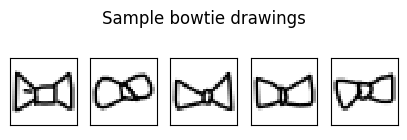

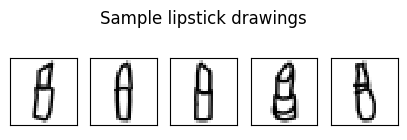

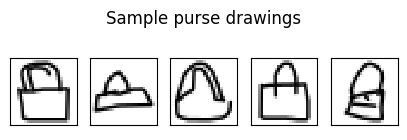

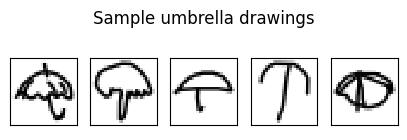

In [4]:
# Plot samples
plot_sample_images(bowtie_, title='Sample bowtie drawings\n')
plot_sample_images(lipstick_, title = 'Sample lipstick drawings\n')
plot_sample_images(purse_, title = 'Sample purse drawings\n')
plot_sample_images(umbrella_, title = 'Sample umbrella drawings\n')

In [13]:
print(len(bowtie))
print(round(len(bowtie)* 0.30))

130283
39085


In [ ]:
n = round(len(bowtie)* 0.30)
images_reshaped = bowtie.reshape((-1, 28, 28))
path_shapes = 'shapes/bowtie/'
path_val_shapes = 'val_shapes/bowtie/'

In [29]:
n = round(len(lipstick)* 0.30)
images_reshaped = lipstick.reshape((-1, 28, 28))
path_shapes = 'shapes/lipstick/'
path_val_shapes = 'val_shapes/lipstick/'

In [32]:
n = round(len(purse)* 0.30)
images_reshaped = purse.reshape((-1, 28, 28))
path_shapes = 'shapes/purse/'
path_val_shapes = 'val_shapes/purse/'

In [35]:
n = round(len(umbrella)* 0.30)
images_reshaped = umbrella.reshape((-1, 28, 28))
path_shapes = 'shapes/umbrella/'
path_val_shapes = 'val_shapes/umbrella/'

In [36]:
import os
# Make sure the folders exists
if not os.path.exists(path_shapes):
    os.makedirs(path_shapes)

if not os.path.exists(path_val_shapes):
    os.makedirs(path_val_shapes)

In [37]:
from PIL import Image
# Loop over each image and save it as a JPG file
for i, image in enumerate(images_reshaped ):
    # Convert the image from a NumPy array to a Pillow Image object
    image = Image.fromarray(image.astype('uint8'), mode='L')
    if i >= n:
        # Save the image as a PNG file
        filename = f"image_{i:04}.jpg"
        # Combine the folder path and file name
        file_path = os.path.join(path_shapes, filename)
        image.save(file_path)
    else: 
        filename = f"image_{i:04}.jpg"
        file_path = os.path.join(path_val_shapes, filename)
        image.save(file_path)
